<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Maria Jose Cantu, Sofia Garcia Mora y Andrés Green

**Fecha:** 2020

**Expediente** : if708916, if714303 e ii713504
    
**Profesor:** Oscar David Jaramillo Zuluaga.

**LINK TAREA:** https://github.com/mariajosecanture/PROYECTO_SG_MJC

# PROYECTO

___
## 1. Entregable.
Los trabajos deben tener los siguientes componentes básicos.

### 1.1 Título del trabajo.
> Debe describir el trabajo.

### 1.2 Objetivos.
> - Se refieren a los propósitos por los cuales se hace el trabajo.
> - Deben ser concretos, evaluables y verificables.
> - Deben ser escritos en infinitivo.
> #### 1.1 Objetivo general.
>  - Fin último de estudio. Se formula atendiendo el propósito global del trabajo. No presenta detalles.
>  - Se orienta a la totalidad del trabajo. Tiene que ver con el título del trabajo.
> #### 1.2 Objetivos específicos
>  - De forma detallada describen cada una de los componentes del trabajo.
>  - En conjunto garantizan la consecución del objetivo general.

Referencia:
- https://es.slideshare.net/rosbur/metodologia-objetivos-generales-y-especficos

### 1.3 Definición del problema.
> Se debe describir en una cuartilla máximo cuál es el escenario de negocio que se va a modelar, identificar cuáles son los supuestos que defines en el negocio y cuáles son los "nodos" o "escenarios" que identificas necesarios simular y porqué. Debes elaborar un diagrama de inicio a fin, identificando los "nodos" o "escenarios" a simular.

### 1.4 Nodos y variables que se decidieron simular y porqué
> En este apartado el objetivo es identificar los problemas que se van a abordar, para examinar la factibilidad y viabilidad de la simulación de los nodos escogidos. Posteriormente se debe de argumentar del porqué de los nodos escogidos.

### 1.5 Definición de hipótesis y supuestos.
>  Para poder modelar un proceso de negocio o cualquiera otro proceso en el área de las ingenierías o ciencias sociales, después de identificar el objeto de estudio, es importante indicar cuales son los supuestos que se dan por verdaderos a lo largo de la ejecución del proceso. Estos supuestos se deben indicar en forma de variables e hipótesis (son diferentes), porque si puedes definir en un valor el supuesto lo llamaremos "supuesto constante" y si no es posible identificarlo con un número entonces será una hipótesis que afectará la construcción de los escenarios posibles del proceso.

### 1.6 Obtención de bases de datos
> El tercer paso del proyecto es indicar de dónde se obtendrán las bases de datos, que indican como se han comportado las variables que identificaste en tu proceso de negocio que vas a simular. En esta investigación debes haber encontrado información propia de la empresa, organización o institución que vas a simular y otra parte de la información debe provenir de investigación que realices en fuentes de información públicas o privadas como las que tiene SECOBI, ahí normalmente y dependiendo del problema elegido, se investigan variables económicas, como tasas de interés, inflación, tipo de cambio, etc., de varios años, por poner un ejemplo.



#### Descarga de librerias

In [1]:
import numpy as np
from functools import reduce
import time
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
from scipy import optimize
import statsmodels.api as sm 


#### Descarga de datos por utilizar 

In [2]:
data = pd.read_excel('DB_homicidios.xlsx')
data.tail()

,Unnamed: 0,Hombre,Mujer,Hombre Menor de edad,Mujer Menor de edad,No especificado,Hombre Mayor de edad,Mujer Mayor de edad,No especificado.1,Hombre Mexicano,...,No especificado.2,Hombre Extraanjero,Mujer Extranjera,No especificado,Hombre Profesional,Mujer Profesional,No especificado.3,Hombre No profesional,Mujer No profesional,No especificado.4
103,2018-08-01,2785,309,216,43,0,2392,250,3,2410,...,NaN,31,4,0,411,52,0,1908,205,1
104,2018-09-01,2780,317,189,34,0,2454,269,0,2449,...,NaN,41,5,0,488,37,0,1859,222,0
105,2018-10-01,2721,318,173,58,0,2372,247,1,2358,...,NaN,21,5,0,482,52,0,1760,219,0
106,2018-11-01,2703,293,220,44,0,2317,237,1,2330,...,NaN,28,8,0,439,53,0,1775,199,1
107,2018-12-01,2598,319,207,52,0,2252,252,0,2240,...,NaN,39,5,0,460,45,0,1689,212,0


### PRIMERO NODO: 
Edad de las personas asesinadas 

In [5]:
data_h_m = data[['Hombre','Mujer']]
data_h_m['Hombre+Mujer']=data_h_m['Hombre']+data_h_m['Mujer']
data_h_m['Prom_hombre']=data_h_m['Hombre']/data_h_m['Hombre+Mujer']

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### HACER EL HISTOGRAMA CON LOS BINS OPTIMOS DE LOS DATOS 

In [6]:
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate

In [7]:
x = data_h_m['Prom_hombre']
y= np.array(x)
y_1=y.reshape(-1, 1)

In [9]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv=20) # 20-fold cross-validation
grid.fit(y_1)
print(grid.best_params_)

{'bandwidth': 0.1}


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [39]:
x_grid.shape
kde = grid.best_estimator_ #FUNCION
pdf = np.exp(kde.score_samples(x_grid[:, None])) #SE EJECUTA CON EL PARAMETRO X_GRID

fig, ax = plt.subplots()
ax.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper left')
ax.set_xlim(-4.5, 3.5);

NameError: name 'x_grid' is not defined

In [43]:
data_h_m['Prom_hombre']

0      0.912099
1      0.909635
2      0.920477
3      0.901229
4      0.914419
5      0.912212
6      0.901805
7      0.905854
8      0.899027
9      0.895918
10     0.897275
11     0.902472
12     0.900000
13     0.898171
14     0.902747
15     0.914571
16     0.914286
17     0.904927
18     0.906987
19     0.880674
20     0.893352
21     0.895641
22     0.892715
23     0.893947
24     0.902643
25     0.882572
26     0.901550
27     0.892459
28     0.894965
29     0.896273
         ...   
78     0.893683
79     0.890189
80     0.890877
81     0.892080
82     0.891803
83     0.885520
84     0.901969
85     0.884514
86     0.889834
87     0.888485
88     0.902041
89     0.881356
90     0.887350
91     0.883864
92     0.896712
93     0.905396
94     0.889655
95     0.900144
96     0.892857
97     0.895040
98     0.889372
99     0.903535
100    0.895054
101    0.892845
102    0.906565
103    0.900129
104    0.897643
105    0.895360
106    0.902203
107    0.890641
Name: Prom_hombre, Lengt

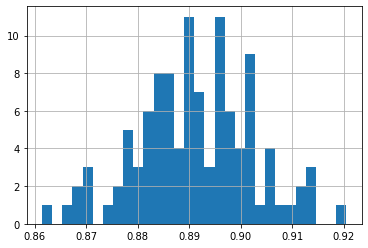

In [10]:
plt.hist(data_h_m['Prom_hombre'], bins=30, label='Probabilidad de hombres asesinados')
plt.grid()
plt.show()

In [11]:
df = [str(i) for i in data_h_m['Prom_hombre']]
df_s=(str(df))
type(df_s)

str

#### OBTENER UNA DISTRIBUCION QUE MAS SE ASEMEJE A LOS DATOS ORIGINALES (ERROR RELATIVO MENOR)

//anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2381: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
//anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:390: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0/np.pi/np.sqrt(x*(1-x))


[88.95315871505059, 516.3924871093483, 8724657744785186.0]

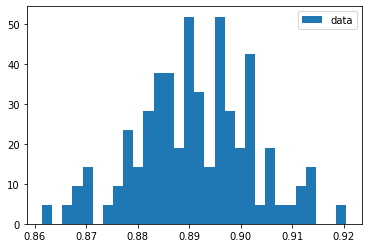

In [12]:
dist_to = [ 'alpha','anglit','arcsine','argus','beta','betaprime','bradford','burr','burr12','cauchy','chi','chi2','cosine','crystalball','dgamma','dweibull','erlang','expon','exponnorm','exponweib','exponpow','f','fatiguelife','fisk','foldcauchy','foldnorm','frechet_r','frechet_l','genlogistic','gennorm','genpareto','genexpon','genextreme','gausshyper','gamma','gengamma','genhalflogistic','gilbrat','gompertz','gumbel_r','gumbel_l','halfcauchy','halflogistic','halfnorm','halfgennorm','hypsecant','invgamma','invgauss','invweibull','johnsonsb','johnsonsu','kappa4','kappa3','ksone','pareto','pearson3','powerlaw','powerlognorm','powernorm','rdist','reciprocal','rayleigh','rice','recipinvgauss','semicircular','skewnorm','t','trapz','triang','truncexpon','truncnorm','tukeylambda','uniform','vonmises','vonmises_line','wald','weibull_min','weibull_max','wrapcauchy']
#dist_to = [ 'alpha','anglit','arcsine']
e= []

data= data_h_m['Prom_hombre']
[y,x,_]= plt.hist(data, bins=30, density=True, label='data')
x= x[1:]

for dist in dist_to:
#fit solo funciona con cintinuas (NO DISCRETAS)
    param= getattr(st, dist).fit(data) #PARAMETRO, MEDIA, DESVIACION ESTANDAR
    pdf= getattr(st,dist).pdf(x, *param)

    plt.legend()
    e.append(((y-pdf)**2).mean())

e #error absoluto 


In [37]:
e_min= np.min(e)
place_e_min= np.where(e==e_min)

dist_opt= dist_to[0]


In [40]:
s= str(place_e_min)
type(s)

str

#### RECTIIFICAR LE ELECCION DE DISTRIBUCCIONO MEDIANTE EL MEDTODO Q-Q

//anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


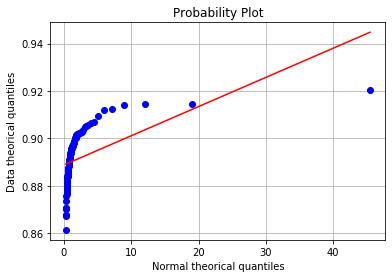

In [46]:
st.probplot(data_h_m['Prom_hombre'],dist="alpha", sparams=getattr(st, dist).fit(x)[:-2],plot=plt)
plt.grid()
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

### 1.7 Visualización de resultados de simulación.
> Se deben simular al menos 4  "nodos" o "escenarios" en tu problema. Para la segunda entrega debes haber elaborado un programa que simule dos de ellos, los primeros dos de tu diagrama.
> Para la entrega final deben de tener los 4 nodos con todas sus simulaciones.

### 1.6 Conclusiones.
> Mucho cuidado, las conclusiones no son cualquier cosa. Se debe concluir respecto a los objetivos planteados de acuerdo a los resultados obtenidos.

### 1.7 Referencias.
> Citar (en formato APA) la bibliografía utilizada.

___
## 2. Especificaciones adicionales.
En el grupo deben haber mínimo dos integrantes y máximo tres integrantes. Para propósitos logísticos nada más, por favor enumérense como *integrante 1*, *integrante 2* e *integrante 3*.

### 2.1 Notebook de jupyter. 
> Los anteriores numerales los deben desarrollar todos en un notebook de jupyter y llamarlo de la siguiente manera `ProyectoModulo1_ApellidoN1_ApellidoN2_ApellidoN3`, donde `ApellidoNi` hace referencia al apellido materno y la inicial del primer nombre del integrante `i`.

### 2.2 Proyecto en `GitHub`.
> El integrante 1 deberá crear un proyecto en `GitHub` llamado **proyecto_modulo1**, donde tendrán todos los archivos relacionados con el proyecto. Los demás integrantes deben hacer un *fork* del proyecto, seguir el proyecto principal con `GitKraken` y hacer al menos dos contribuciones con *pull request* (como se hizo en la tarea). En el proyecto, deben incluir el repositorio remoto del integrante 1.

### 2.3 Presentación.
> Recuerden que la nota del proyecto es mitad el trabajo, y mitad la presentación. Deben hacer una presentación ya sea en power point o utlizando un notebook de python para presentar el trabajo durante un horario de clase que se será posteriomente definido. La presentación, además de llevar todos los componentes básicos descritos en el entregable, debe llevar una tabla de contenido.
> - Presentación: 10 minutos.
> - Seguir estas recomendaciones: https://es.slideshare.net/MeireComputacion/power-point-pautas-para-una-buen-trabajo

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>